<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis
</div>

In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm

In [2]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [3]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_number          2747 non-null   int64  
 1   quantity_ordered      2747 non-null   int64  
 2   price_per_unit        2747 non-null   float64
 3   orderline_number      2747 non-null   int64  
 4   sales                 2747 non-null   float64
 5   order_date            2747 non-null   object 
 6   days_since_lastorder  2747 non-null   int64  
 7   status                2747 non-null   object 
 8   productline           2747 non-null   object 
 9   retail_price          2747 non-null   int64  
 10  product_code          2747 non-null   object 
 11  customer_name         2747 non-null   object 
 12  phone                 2747 non-null   object 
 13  address               2747 non-null   object 
 14  city                  2747 non-null   object 
 15  postalcode           

In [4]:
processed_df["order_date"] = pd.to_datetime(processed_df["order_date"],dayfirst = True)
processed_df

order_number  quantity_ordered  price_per_unit  orderline_number  \
0            10107                30           95.70                 2   
1            10121                34           81.35                 5   
2            10134                41           94.74                 2   
3            10145                45           83.26                 6   
4            10168                36           96.66                 1   
...            ...               ...             ...               ...   
2742         10350                20          112.22                15   
2743         10373                29          137.19                 1   
2744         10386                43          125.99                 4   
2745         10397                34           62.24                 1   
2746         10414                47           65.52                 9   

        sales order_date  days_since_lastorder    status  productline  \
0     2871.00 2018-02-24                   828   Shipped  Motorcycles   
1     2765.90 2018-05-07                   757   Shipped  Motorcycles   
2     3884.34 2018-07-01                   703   Shipped  Motorcycles   
3     3746.70 2018-08-25                   649   Shipped  Motorcycles   
4     3479.76 2018-10-28                   586   Shipped  Motorcycles   
...       ...        ...                   ...       ...          ...   
2742  2244.40 2019-12-02                  2924   Shipped        Ships   
2743  3978.51 2020-01-31                  2865   Shipped        Ships   
2744  5417.57 2020-03-01                  2836  Resolved        Ships   
2745  2116.16 2020-03-28                  2810   Shipped        Ships   
2746  3079.44 2020-05-06                  2772   On Hold        Ships   

      retail_price product_code            customer_name             phone  \
0               95     S10_1678        Land of Toys Inc.        2125557818   
1               95     S10_1678       Reims Collectables        26.47.1555   
2               95     S10_1678          Lyon Souveniers  +33 1 46 62 7555   
3               95     S10_1678        Toys4GrownUps.com        6265557265   
4               95     S10_1678     Technics Stores Inc.        6505556809   
...            ...          ...                      ...               ...   
2742            54     S72_3212    Euro Shopping Channel    (91) 555 94 44   
2743            54     S72_3212  Oulu Toy Supplies, Inc.        981-443655   
2744            54     S72_3212    Euro Shopping Channel    (91) 555 94 44   
2745            54     S72_3212             Alpha Cognac        61.77.6555   
2746            54     S72_3212        Gifts4AllAges.com        6175559555   

                            address        city postalcode  country  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

      last_name first_name deal_size  
0            Yu       Kwai     Small  
1       Henriot       Paul     Small  
2      Da Cunha     Daniel    Medium  
3         Young      Julie    Medium  
4        Hirano       Juri    Medium  
...         ...        ...       ...  
2742     Freyre      Diego     Small  
2743  Koskitalo     Pirkko    Medium  
2744     Freyre      Diego    Medium  
2745     Roulet    Annette     Small  
2746    Yoshido      

# Question 1: Doanh số bán hàng theo từng quốc gia như thế nào?

## Step 1: Purpose

- Dùng để biết được sự phân bố của doanh số bán hàng theo từng quốc gia là như thế nào:
    - Khu vực nào đóng góp vào doanh số bán hàng là nhiều nhất.
    - Khu vực nào bắt đầu được khai thác để tạo ra lợi ích (doanh thu ít).
    - Khu vực nào đang có tiềm năng để khai thác nhưng chưa được khai thác.

## Step 2: Analyzing

In [5]:
cleaned_df = processed_df.groupby(['country']).sum(numeric_only=True)['sales']
cleaned_df = cleaned_df.rename(index={'USA': 'United States of America','UK': 'United Kingdom'})
cleaned_df

country
Australia                    630623.10
Austria                      202062.53
Belgium                      108412.62
Canada                       224078.56
Denmark                      245637.15
Finland                      329581.91
France                      1110916.52
Germany                      220472.09
Ireland                       57756.43
Italy                        374674.31
Japan                        188167.81
Norway                       307463.70
Philippines                   94015.73
Singapore                    288488.41
Spain                       1215686.92
Sweden                       210014.21
Switzerland                  117713.56
United Kingdom               478880.46
United States of America    3355575.69
Name: sales, dtype: float64

In [6]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf['sales'] = 0
for country in cleaned_df.index:
    gdf.loc[gdf.name == country, 'sales'] = cleaned_df[country]
### Missing Singapore

C:\Users\HP\AppData\Local\Temp\ipykernel_6824\3743934022.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## Step 3: Visualization

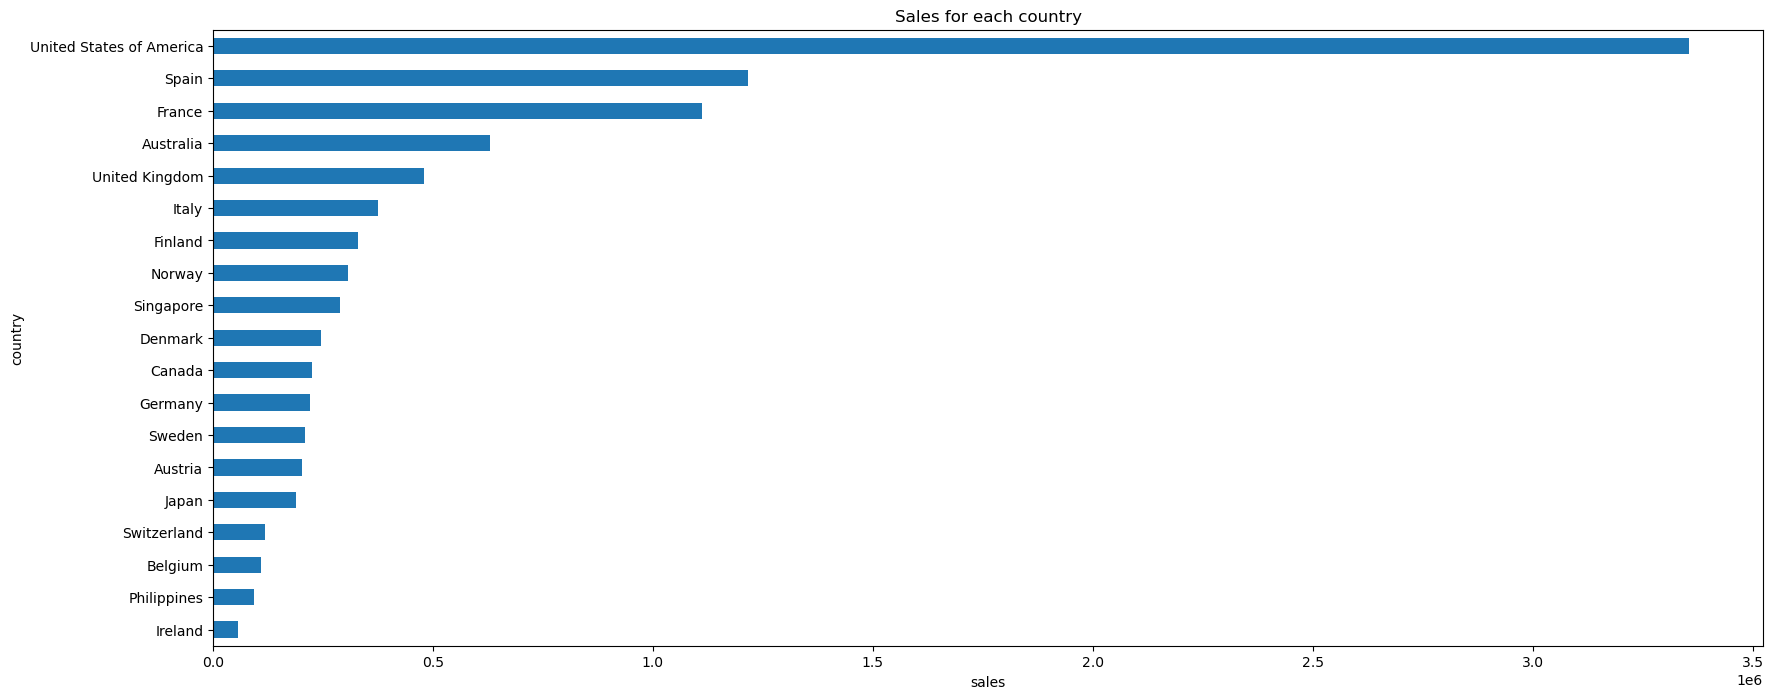

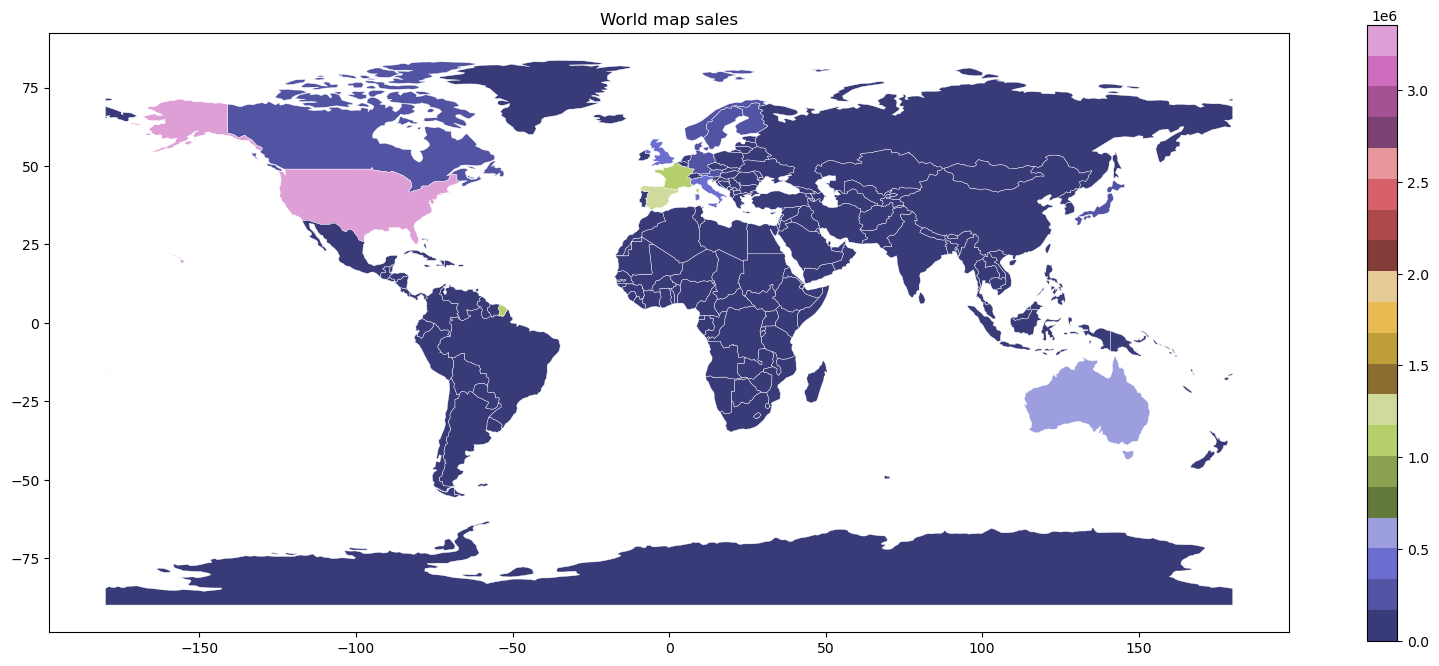

In [7]:
plt.figure(figsize=(20,8))
cleaned_df.sort_values().plot(kind='barh')
plt.xlabel('sales')
plt.title('Sales for each country')
plt.show()

cmap = 'tab20b'
cbar = plt.cm.ScalarMappable(cmap=cmap)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
gdf.plot(column='sales', cmap=cmap, legend=True, ax=ax, edgecolor="white", linewidths=0.3)
plt.title("World map sales")
plt.show()

## Step 4: Give observations

Từ biểu đồ, ta có thể rút ra được các kết luận sau:
- Doanh số bán hàng chủ yếu tập trung ở Mỹ và các nước châu Âu, cần tập trung nhiều hơn vào những thị trường ở những quốc gia này.
- Một số các khu vực khác mà công ty cũng đang bắt đầu khai thác để tạo ra doanh thu nhiều hơn bao gồm Canada, Úc và một số nước châu Âu.
- Tiếp tục khám phá tiềm năng doanh thu ở các quốc gia châu Á nhiều hơn để tăng doanh thu cho công ty.

# Question 2: Sự thay đổi doanh thu của từng dòng sản phẩm theo thời gian được biểu hiện như thế nào?

## Step 1: Purpose

- Dùng để biết được sự thay đổi của doanh thu theo từng dòng sản phẩm theo thời gian.
- Biết được dòng sản phẩm nào là quan trọng (đóng góp nhiều vào tổng doanh thu cho công ty).
- Biết được xu hướng mua hàng của từng dòng sản phẩm từ đó có thể phân phối kinh doanh hợp lý.

## Step 2: Analyzing

In [8]:
cleaned_df = processed_df.copy()
cleaned_df
product_lines = cleaned_df.productline.unique()
product_lines

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [9]:
cleaned_df = cleaned_df.groupby([cleaned_df['order_date'].dt.year,cleaned_df['order_date'].dt.month,'productline']).sum(numeric_only=True)
cleaned_df.index.names = ['year','month','productline']
cleaned_df = cleaned_df.reset_index()
cleaned_df['order_date'] = pd.to_datetime(dict(year=cleaned_df.year, month=cleaned_df.month, day=1))
cleaned_df

year  month       productline  order_number  quantity_ordered  \
0    2018      1      Classic Cars        101037               334   
1    2018      1            Trains         20208                81   
2    2018      1  Trucks and Buses        111137               370   
3    2018      1      Vintage Cars        161626               572   
4    2018      2      Classic Cars         30315               120   
..    ...    ...               ...           ...               ...   
174  2020      5            Planes        124990               383   
175  2020      5             Ships         93727               303   
176  2020      5            Trains         31240               123   
177  2020      5  Trucks and Buses        229199               832   
178  2020      5      Vintage Cars        260474               867   

     price_per_unit  orderline_number     sales  days_since_lastorder  \
0           1308.28                67  41191.78                 19277   
1            119.18                 6   4933.55                  6218   
2           1093.72                75  36801.43                 23323   
3           1423.77               102  46826.84                 30741   
4            513.57                31  20464.41                  3094   
..              ...               ...       ...                   ...   
174         1113.97                91  34272.85                 24361   
175          830.17                62  26735.01                 20656   
176          234.57                24  10257.87                  5691   
177         2253.09               139  89726.28                 28771   
178         2020.15               105  73094.24                 32342   

     retail_price order_date  
0            1298 2018-01-01  
1             120 2018-01-01  
2            1129 2018-01-01  
3            1403 2018-01-01  
4             516 2018-02-01  
..            ...        ...  
174          1069 2020-05-01  
175           775 2020-05-01  
176           220 2020-05-01  
177          2258 2020-05-01  
178          2128 2020-05-01  

[179 rows x 11 columns]

## Step 3: Visualization

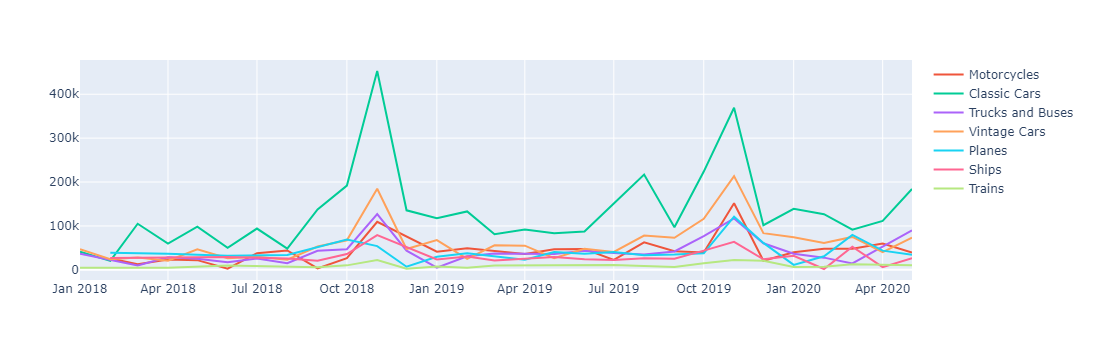

In [10]:
fig = px.line()
for i in range(0,len(product_lines)):
    temp = cleaned_df[cleaned_df['productline']==product_lines[i]][['order_date','sales']].groupby('order_date').sum().reset_index()
    fig.add_scatter(x=temp['order_date'], y=temp["sales"], name=product_lines[i])
fig.show()
# export html file to see the plot
fig.write_html("./figures/productlineThroughTime.html")

## Step 4: Give observations

- Classic Cars là dòng sản phẩm giúp công ty thu về doanh thu cao nhất, tiếp theo đó là các dòng sản phẩm tiệm cận với xe điện như là Vintage Cars, Trucks and Buses, Motorcycles.
- Các dòng sản phẩm như Classic Cars, Trucks and Buses đang có xu hướng tăng trưởng về doanh thu trong thời gian gần đây.
- Ngược lại, Planes đang có xu hướng giảm, Trains không đóng góp nhiều vào doanh thu cho công ty.
- 2 thời điểm có doanh thu vượt trội so với phần còn lại là tháng 11 của năm 2018 và 2019. Nguyên nhân có thể là do có các sự kiện lớn xảy ra vào thời gian này đó là Black Friday hay là hậu Haloween... khiến cho doanh thu của công ty tăng vọt.

# Question 3: Liệu một món hàng có kích thước lớn thì xác suất mà nó bị hủy có cao hơn so với món hàng có kích thước nhỏ hơn hay không?

## Step 1: Purpose

- Vì chi phí hủy (điển hình là chi phí vận chuyển) của khách hàng có thể gây tốn kém cho công ty nên cần phải cân nhắc trong việc điều tiết chiến lược bán hàng cho những đơn hàng thường bị hủy.

## Step 2: Analyzing

In [11]:
cleaned_df = processed_df[processed_df['status']=='Cancelled'][['sales','deal_size']].groupby('deal_size').count()
cleaned_df = cleaned_df.rename(columns={"sales": "count_cancelled"}).sort_values('count_cancelled')
cleaned_df

count_cancelled
deal_size                 
Small                   27
Medium                  33

In [12]:
cleaned_df.loc['Large'] = 0
cleaned_df

count_cancelled
deal_size                 
Small                   27
Medium                  33
Large                    0

## Step 3: Visualization

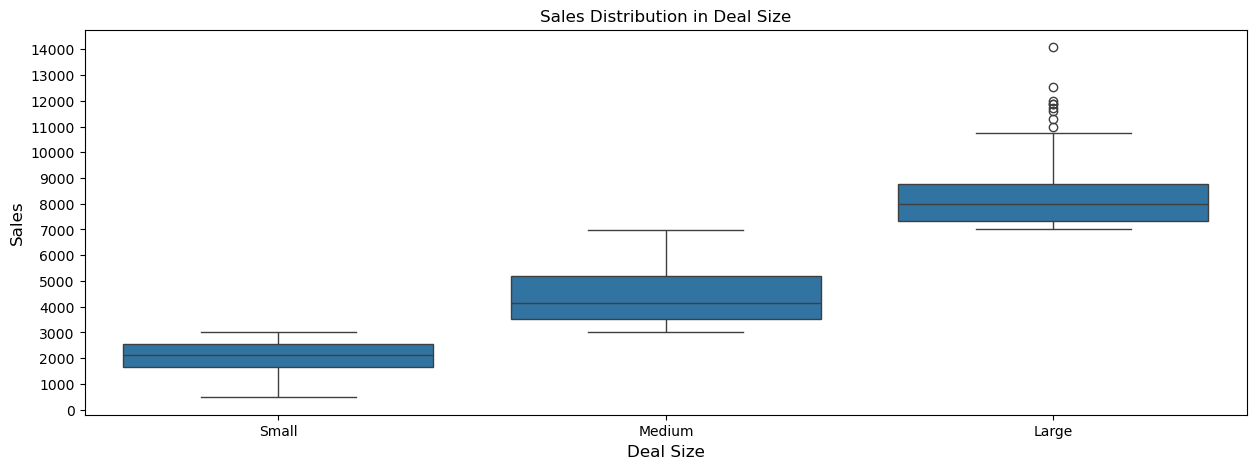

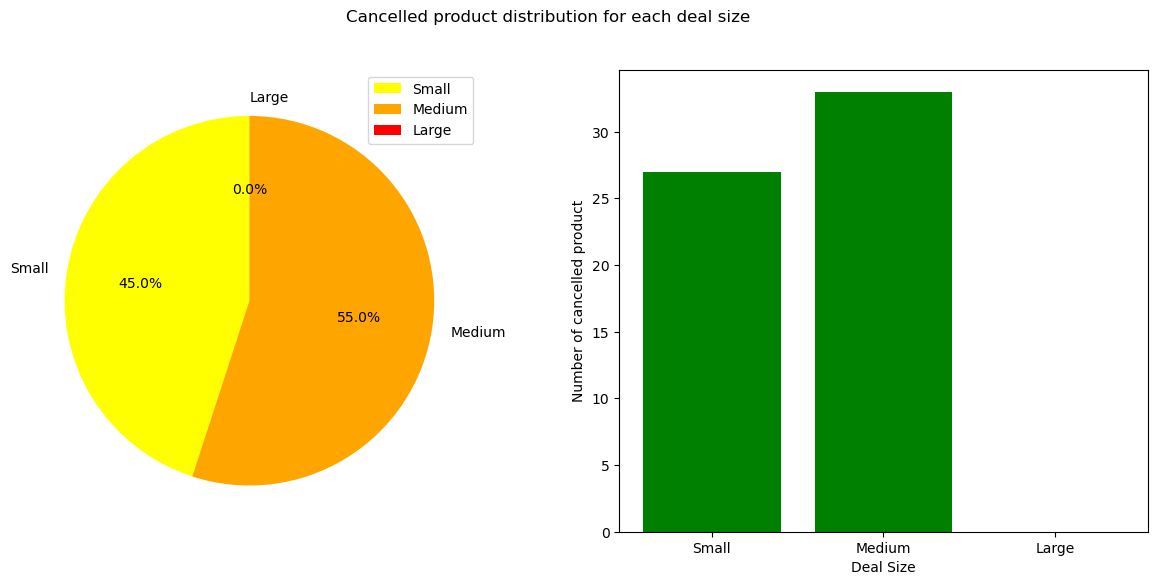

In [13]:
plt.figure(1 , figsize = (15,5))
sns.boxplot(x = 'deal_size' , y = 'sales' , data = processed_df, legend=False)
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,15000,1000))  
plt.show()

fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=2)
fig.suptitle('Cancelled product distribution for each deal size')
plt.subplot(121)
plt.pie(cleaned_df['count_cancelled'].values, labels=cleaned_df.index, autopct='%1.1f%%', startangle=90, colors=["yellow", "orange", "red"])
plt.legend(loc='best')
plt.subplot(122)
plt.bar(cleaned_df.index, cleaned_df['count_cancelled'].values, color = "green")
plt.ylabel('Number of cancelled product')
plt.xlabel('Deal Size')
plt.show()

## Step 4: Give observations

- Ta thấy, khách hàng thường sẽ hủy những món hàng có kích thước từ nhỏ đến vừa, vì những món hàng có kích thước lớn thường là những đơn hàng quan trọng, tốn chi phí lớn, nên khách hàng sẽ thường cân nhắc khi mua nhiều hơn so với những món hàng nhỏ. Chính vì thế, việc hủy đơn hàng trên các món hàng lớn hầu như không xảy ra.
- Vì xác suất hủy hàng tập trung ở những món hàng có kích thước vừa và nhỏ nên công ty cần kiểm soát việc mua hàng của khách hàng nhiều hơn vào những món hàng này. Ví dụ về phương pháp như là: bổ sung nhiều hình thức xác nhận đơn hàng hơn, thanh toán với chi phí vận chuyển cao hơn đối với những món hàng có kích thước nhỏ (chi phí nhỏ).

# Question 4: Sự chêch lệch giữa giá niêm yết (MSPR) và giá thực sự bán ra có ảnh hưởng đến doanh thu?

## Step 1: Purpose
- Nhà sản xuất có thể điều chỉnh chiến lược giá để tối ưu hóa doanh thu. Điều này có thể bao gồm xem xét giảm giá hoặc tăng giá trong các trường hợp cụ thể để đạt được hiệu suất kinh doanh tốt nhất
- Phân tích giá có thể giúp nhà sản xuất hiểu rõ mức độ nhạy cảm của khách hàng đối với sự chênh lệch giá. Có thể có các nhóm khách hàng có xu hướng phản ứng mạnh mẽ hơn hoặc yếu đối với sự biến động giá.

## Step 2: Analyzing

- Tính độ chênh lệch giữa giá bán và giá gốc.
- Chia thành các bin để tính số lượng và doanh thu tương ứng với mỗi bin.

In [14]:
processed_df["price_diff"] = processed_df["price_per_unit"] - processed_df["retail_price"]

# Phân loại các khoảng chênh lệch giá và tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi bin
price_diff_bins = [processed_df["price_diff"].min(), -50, -10, 0, 10, 50, 100, processed_df["price_diff"].max()] 

processed_df['price_diff_bins'] = pd.cut(processed_df['price_diff'], bins=price_diff_bins)

# Tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi khoảng chênh lệch giá
price_diff_stats = processed_df.groupby('price_diff_bins').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()

## Step 3: Visualization

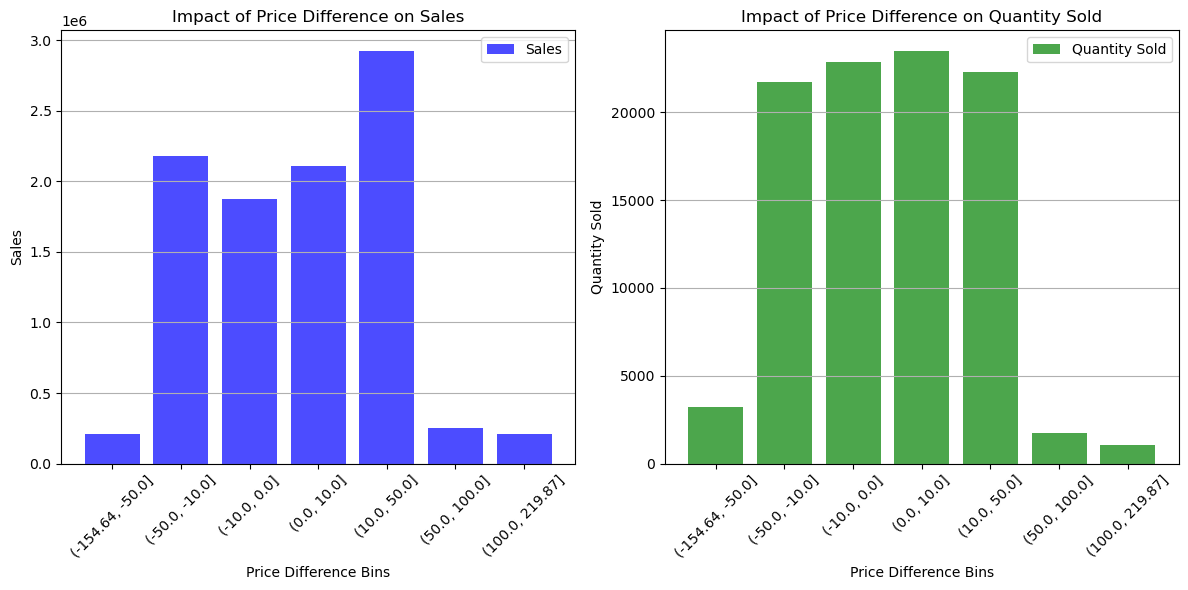

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sales
ax[0].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['sales'], color='blue', alpha=0.7, label='Sales')
ax[0].set_xlabel('Price Difference Bins')
ax[0].set_ylabel('Sales')
ax[0].set_title('Impact of Price Difference on Sales')
ax[0].legend()
ax[0].tick_params(axis='x', rotation=45) 
ax[0].grid(True, axis='y') 

# Quantity Sold
ax[1].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['quantity_ordered'], color='green', alpha=0.7, label='Quantity Sold')
ax[1].set_xlabel('Price Difference Bins')
ax[1].set_ylabel('Quantity Sold')
ax[1].set_title('Impact of Price Difference on Quantity Sold')
ax[1].legend()
ax[1].tick_params(axis='x', rotation=45) 
ax[1].grid(True, axis='y')  

plt.tight_layout()

plt.show()

## Step 4: Give observations

- Khách hàng có xu hướng khá nhạy cảm với giá
- Giá bán ra lớn hơn từ 50 đô trở đi cho sản phẩm làm người mua ngại bỏ ra số tiền của họ.
- Với giá cả quá thấp so với giá niêm yết, có thể đó là những sản phẩm out-dated nên không có được sức mua mạnh mẽ từ người dùng.

**-> Khách hàng có xu hướng mua mạnh khi chêch lệch giữa giá niêm yết và giá bán thực tế không quá nhiều:** mức độ chêch lệch khoảng 50 đô.

Tiếp theo, ta tìm hiểu thời gian mà doanh số tăng mạnh
- Giúp nhà sản xuất có thể dựa vào đó để có các chiến lược định giá, thu hút khách hàng

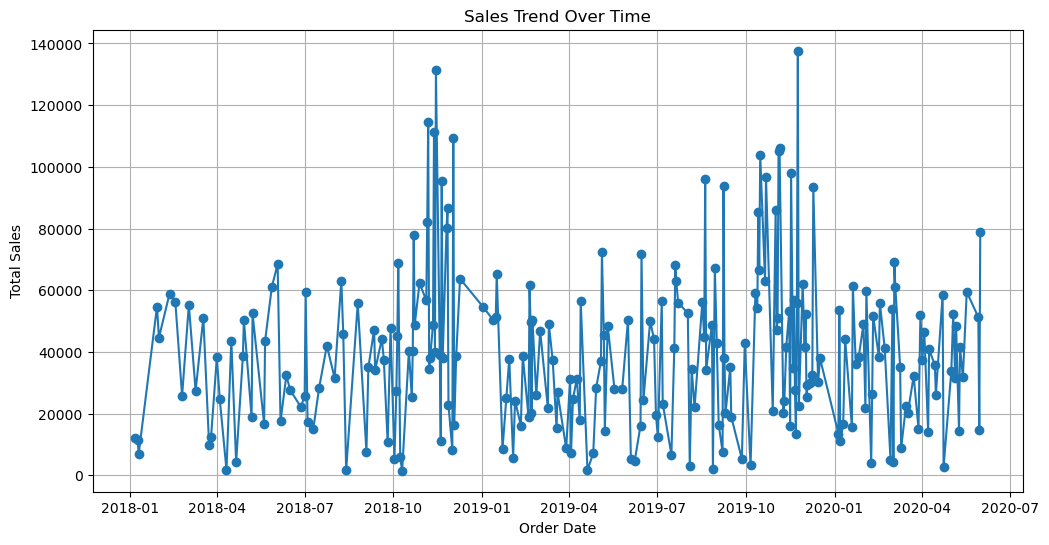

In [16]:
processed_df['order_date'] = pd.to_datetime(processed_df['order_date'])

sales_by_date = processed_df.groupby('order_date')['sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Từ biểu đồ, ta thấy được khoảng thời gian số lượng đặt hàng tăng mạnh là tầm khoảng tháng 10-12 hằng năm. Bởi lúc đó là dịp cuối năm, có nhiều đợt sale và lễ như Black Friday, Christmas...
**-> Nhà sản xuất nên tận dụng các dịp lễ, giáng sinh để điều chỉnh giá cả hợp lý, kích thích nhu cầu của khách hàng**

# Question 5: Dựa trên phân loại khách hàng, cho biết sản phẩm được yêu thích bởi các nhóm khách hàng khác nhau?

## Step 1: Purpose

- Nắm bắt nhu cầu khách hàng: Phân loại khách hàng giúp doanh nghiệp hiểu rõ hơn về nhu cầu và mong muốn của từng nhóm. 
- Chăm sóc khách hàng hiệu quả: Việc phân loại khách hàng giúp tập trung tài nguyên và chiến lược chăm sóc khách hàng theo từng nhóm. Các chiến lược quảng cáo và tương tác có thể được tối ưu hóa để đáp ứng nhu cầu cụ thể của từng đối tượng khách hàng.
- Việc nắm rõ về sản phẩm ưa thích giúp công ty có điều chỉnh chiến lược cụ thể như lượng cung cầu sản phẩm, cho từng nhóm khách hàng
Ngoài ra, đề xuất các kế hoạch phát triển và quảng cáo sản phẩm mới nhắm vào nhu cầu của nhóm khách hàng tương ứng.

## Step 2: Analyzing
RFM Segmentation là quá trình phân loại khách hàng thành các nhóm dựa trên ba yếu tố R-F-M trong mô hình RFM. Giúp doanh nghiệp hiểu rõ hơn về khách hàng và tạo ra các chiến lược tiếp thị và quản lý quan hệ khách hàng phù hợp.

Phân loại khách hàng dựa trên RFM 

- recency: Ngày mua hàng gần đây nhất
- frequency: Tần suất mua hàng trong khoảng thời gian xác định
- monetary: Tổng chi tiêu mà khách hàng đã bỏ ra


In [17]:
# chọn mốc thời gian '2020-9-30'  làm time stone vì đó là cuối quý 3 năm 2020
timestone = '2020-9-30'

processed_df['order_date'] = pd.to_datetime(processed_df['order_date'], dayfirst=True)

# Recency
processed_df['Recency'] = (pd.to_datetime(timestone) - processed_df['order_date']).dt.days 

# Frequency
frequency = processed_df.drop_duplicates(subset= 'order_number').groupby('customer_name')['order_number'].count().reset_index(name='Frequency')

# Monetary
monetary = processed_df.groupby('customer_name')['sales'].sum().reset_index(name='Monetary')

# merge 3 columns and customer
rfm = frequency.merge(monetary, on='customer_name')
rfm = rfm.merge(processed_df[['customer_name', 'Recency']], on='customer_name')

rfm_segment = rfm.groupby('customer_name').agg({'Frequency': 'mean', 'Monetary': 'sum', 'Recency': 'min'}).reset_index()

rfm_segment

customer_name  Frequency    Monetary  Recency
0                AV Stores, Co.        3.0  8048198.31      318
1                  Alpha Cognac        3.0  1409768.80      186
2            Amica Models & Co.        2.0  2447048.76      387
3       Anna's Decorations, Ltd        4.0  7083821.98      205
4             Atelier graphique        3.0   169259.72      310
..                          ...        ...         ...      ...
84              Vida Sport, Ltd        2.0  3649120.36      397
85              Vitachrome Inc.        3.0  2201031.50      330
86     Volvo Model Replicas, Co        4.0  1439342.72      316
87  West Coast Collectables Co.        2.0   599100.32      610
88            giftsbymail.co.uk        2.0  2034261.84      334

[89 rows x 4 columns]

### Để phân loại khách hàng, ta vẽ biểu đồ để trực quan về các số liệu `Recency`, `Monetary`, `Frequency`

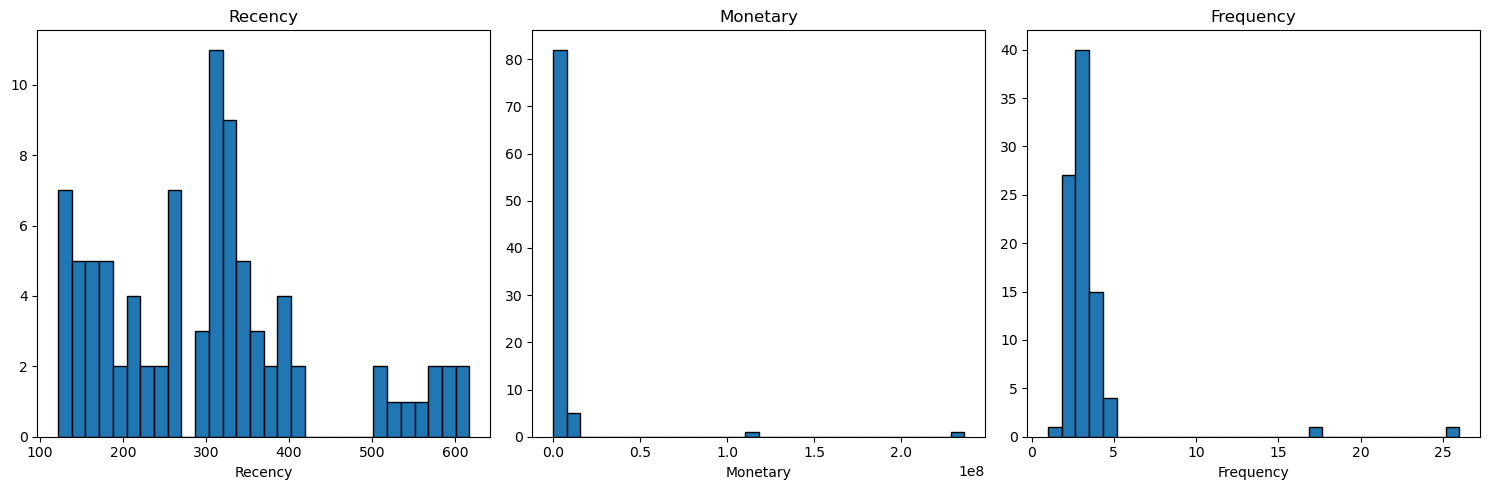

In [18]:
cols = ['Recency', 'Monetary', 'Frequency']
# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(cols):
    ax[i].hist(rfm_segment[col], bins=30, edgecolor='black')
    ax[i].set_xlabel(col)
    ax[i].set_title(f'{col}')
plt.tight_layout()

plt.show()

Từ biểu đồ, ta có các ngưỡng để phân loại khách hàng:
- `Recency`: Lựa chọn ngưỡng là 500 dựa trên 2 yếu tố:

    - 500 tương đương với một năm rưỡi mà khách hàng không quay lại
    - Dựa vào biểu đồ
            
-  `Frequecy`: Tần số quay lại trên 15 là tiêu chí cho khách hàng quan trọng

In [19]:
def segment(row):
    if (row['Recency']  <= 270 and row['Frequency'] >= 15) or row['Monetary'] >= 6000000:
        return 'Important Value Customer'
    elif row['Frequency'] <= 1 and row['Recency'] >= 500:
        return 'Low-Value Customer'
    else:
        return 'General Value Customer'
    
print("Phân loại khách hàng")
rfm_segment['Segment'] = rfm_segment.agg(segment, axis=1)
rfm_segment['Segment'].value_counts().to_frame().reset_index()

Phân loại khách hàng


index  Segment
0    General Value Customer       77
1  Important Value Customer       12

In [20]:
merge_df = processed_df.merge(rfm_segment[['Segment', 'customer_name']], on='customer_name')
merge_df

order_number  quantity_ordered  price_per_unit  orderline_number  \
0            10107                30           95.70                 2   
1            10329                42          104.67                 1   
2            10107                39           99.91                 5   
3            10329                20          158.80                 2   
4            10107                27          224.65                 4   
...            ...               ...             ...               ...   
2742         10290                45          114.92                 1   
2743         10352                23          102.29                 3   
2744         10352                49          100.72                 2   
2745         10352                22           75.51                 1   
2746         10352                49           52.64                 4   

        sales order_date  days_since_lastorder   status   productline  \
0     2871.00 2018-02-24                   828  Shipped   Motorcycles   
1     4396.14 2019-11-15                   216  Shipped   Motorcycles   
2     3896.49 2018-02-24                   878  Shipped   Motorcycles   
3     3176.00 2019-11-15                   266  Shipped   Motorcycles   
4     6065.55 2018-02-24                   902  Shipped   Motorcycles   
...       ...        ...                   ...      ...           ...   
2742  5171.40 2019-09-07                  2289  Shipped  Vintage Cars   
2743  2352.67 2019-12-03                  2660  Shipped         Ships   
2744  4935.28 2019-12-03                  2687  Shipped        Planes   
2745  1661.22 2019-12-03                  2869  Shipped        Planes   
2746  2579.36 2019-12-03                  2895  Shipped        Planes   

      retail_price  ...        city postalcode country last_name first_name  \
0               95  ...         NYC      10022     USA        Yu       Kwai   
1               95  ...         NYC      10022     USA        Yu       Kwai   
2              118  ...         NYC      10022     USA        Yu       Kwai   
3              118  ...         NYC      10022     USA        Yu       Kwai   
4              193  ...         NYC      10022     USA        Yu       Kwai   
...            ...  ...         ...        ...     ...       ...        ...   
2742            97  ...  Brickhaven      58339     USA    Taylor     Leslie   
2743            90  ...  Brickhaven      58339     USA    Taylor     Leslie   
2744            99  ...  Brickhaven      58339     USA    Taylor     Leslie   
2745            74  ...  Brickhaven      58339     USA    Taylor     Leslie   
2746            49  ...  Brickhaven      58339     USA    Taylor     Leslie   

     deal_size price_diff price_diff_bins Recency                   Segment  
0        Small       0.70     (0.0, 10.0]     949  Important Value Customer  
1       Medium       9.67     (0.0, 10.0]     320  Important Value Customer  
2       Medium     -18.09  (-50.0, -10.0]     949  Important Value Customer  
3       Medium      40.80    (10.0, 50.0]     320  Important Value Customer  
4       Medium      31.65    (10.0, 50.0]     949  Important Value Customer  
...        ...        ...             ...     ...                       ...  
2742    Medium      17.92    (10.0, 50.0]     389    General Value Customer  
2743     Small      12.29    (10.0, 50.0]     302    General Value Customer  
2744    Medium       1.72     (0.0, 10.0]     302    General Value Customer  
2745     Small       1.51     (0.0, 10.0]     302    General Value Customer  
2746     Small       3.64     (0.0, 10.0]     302    General Value Customer  

[2747 rows x 24 columns]

## Step 3: Visualization
- Dùng group bar chart để minh họa số lượng sản phẩm bán ra bởi hai tệp khách hàng.

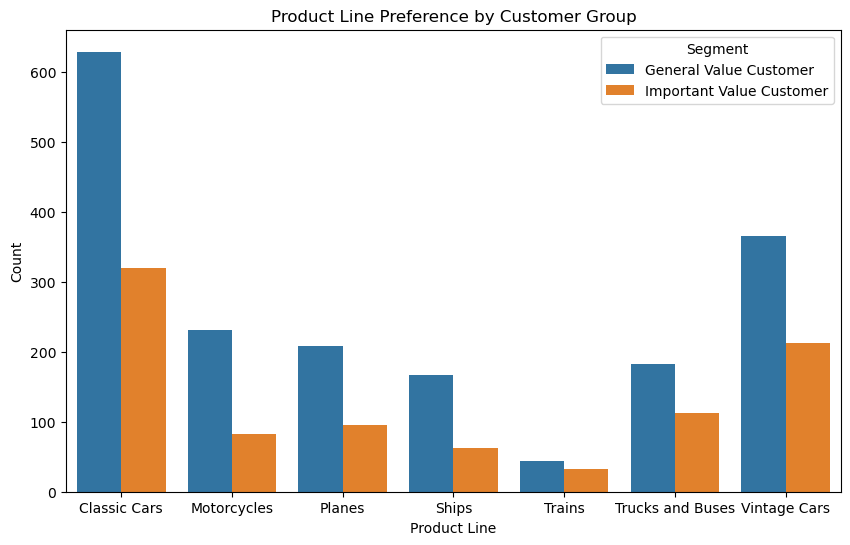

In [21]:
product_line_counts = merge_df.groupby(['Segment', 'productline']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='productline', y='Count', hue='Segment', data=product_line_counts)
plt.title('Product Line Preference by Customer Group')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

## Step 4: Give observations
- Hầu hết ở cả hai nhóm khách hàng đều có sự yêu thích các loại sản phẩm giống nhau
- Tuy số lượng khách hàng quan trọng và khách hàng thường có sự chêch lệch đáng kể ( 1:6) nhưng sức mua hàng của khách hàng quan trọng xấp xỉ một nửa lượng mua hàng của nhóm khách hàng thường
*-> Nhà sản xuất cần có các chiến lược để thu hút các khách hàng quan trọng.*


### Để thấy được tỉ lệ yêu thích của khách hàng với từng loại sản phẩm, ta sẽ dùng pie chart để hiển thị

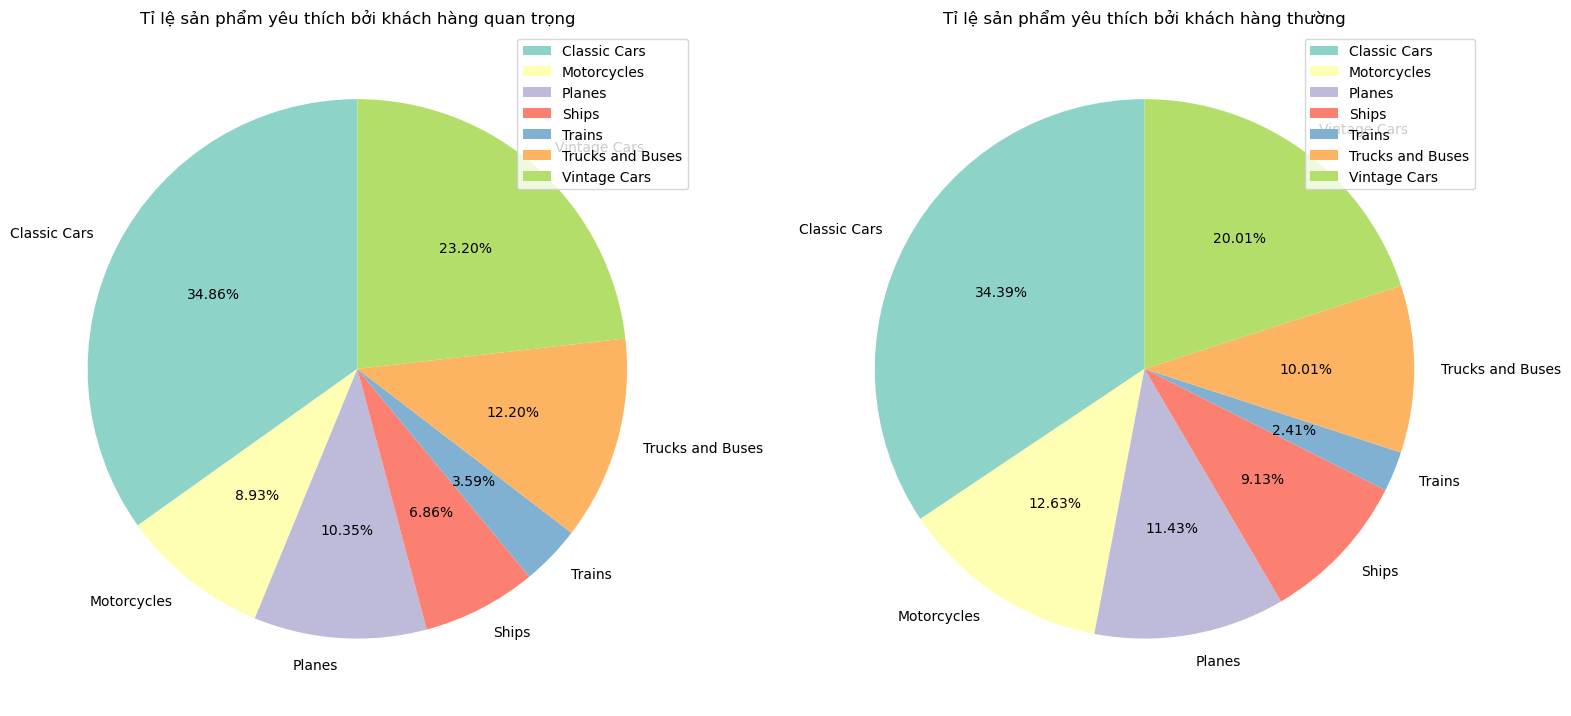

In [22]:
important = product_line_counts[product_line_counts['Segment'] == 'Important Value Customer']
general = product_line_counts[product_line_counts['Segment'] == 'General Value Customer']

kwrangs = {
    'autopct': '%1.2f%%',
    'startangle': 90,
    'colors': sns.color_palette('Set3'),
}

# Pie chart cho nhóm Khách hàng quan trọng
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.pie(important['Count'], labels=important['productline'], **kwrangs)
plt.title('Tỉ lệ sản phẩm yêu thích bởi khách hàng quan trọng')
plt.legend()

# Pie chart cho nhóm Khách hàng thường
plt.subplot(1, 2, 2)
plt.pie(general['Count'], labels=general['productline'], **kwrangs)
plt.title('Tỉ lệ sản phẩm yêu thích bởi khách hàng thường')
plt.legend()

plt.tight_layout()
plt.show()

Nhận xét:
- Cả hai nhóm khách hàng đều có sở thích tương đồng với nhau
- Đặc biệt mặt hàng Classic Cars và Vintage Cars rất được ưa chuộng.

# Question 6: Khách hàng thường có xu hướng mua các dòng sản phẩm nào cùng nhau?

## Step 1: Purpose
- Nhà sản xuất có thể điều chỉnh chiến lược tiếp thị bằng cách đặt chú ý và quảng cáo chúng cùng một lúc để tăng cơ hội được chú ý.
- Công ty nắm được xu thế mua sắm của khách hàng, dự đoán được các mặt hàng được mua cùng nhau sẽ giúp công ty có thể quản lý hàng tồn kho một cách tốt hơn.
- Làm mới sản phẩm: vào các dịp đặc biệt nhà sản xuất có thể phát hành các bộ sưu tập phiên bản giới hạn nhằm kích cầu người tiêu dùng.

## Step 2: Analyzing

In [23]:
line_df = processed_df.groupby(['order_number'])['productline'].agg([set])
line_df.reset_index(level= 0 ,inplace=True)
line_df.drop(['order_number'], axis=1, inplace=True)
line_df.columns = ['productline']
line_df

productline
0                                    {Vintage Cars}
1                                    {Vintage Cars}
2                                    {Vintage Cars}
3    {Trucks and Buses, Vintage Cars, Classic Cars}
4          {Trucks and Buses, Classic Cars, Trains}
..                                              ...
293                                  {Vintage Cars}
294                                  {Vintage Cars}
295                                  {Vintage Cars}
296  {Trucks and Buses, Vintage Cars, Classic Cars}
297                {Trucks and Buses, Classic Cars}

[298 rows x 1 columns]

- Tạo dataframe với index các dòng, các cột là `productline`
- Giá trị mỗi ô chính là số lần hai sản phẩm xuất hiện trong cùng một đơn hàng.

In [24]:
cols = line_df['productline'].explode().unique()
product_combinations = {}

for product_line_set in line_df['productline']:
    products = list(product_line_set)
    if len(products) == 0: continue
    for i in range(len(products) - 1):
        for j in range(i + 1, len(products)):
            combination = (products[i], products[j])
            product_combinations[combination] = product_combinations.get(combination, 0) + 1
            combination = (products[j], products[i])
            product_combinations[combination] = product_combinations.get(combination, 0) + 1

product_combinations_df = pd.DataFrame(index=cols, columns=cols, data=0)

for combination, count in product_combinations.items():
    product_combinations_df.at[combination[0], combination[1]] = count
    product_combinations_df.at[combination[1], combination[0]] = count

## Step 3: Visualization

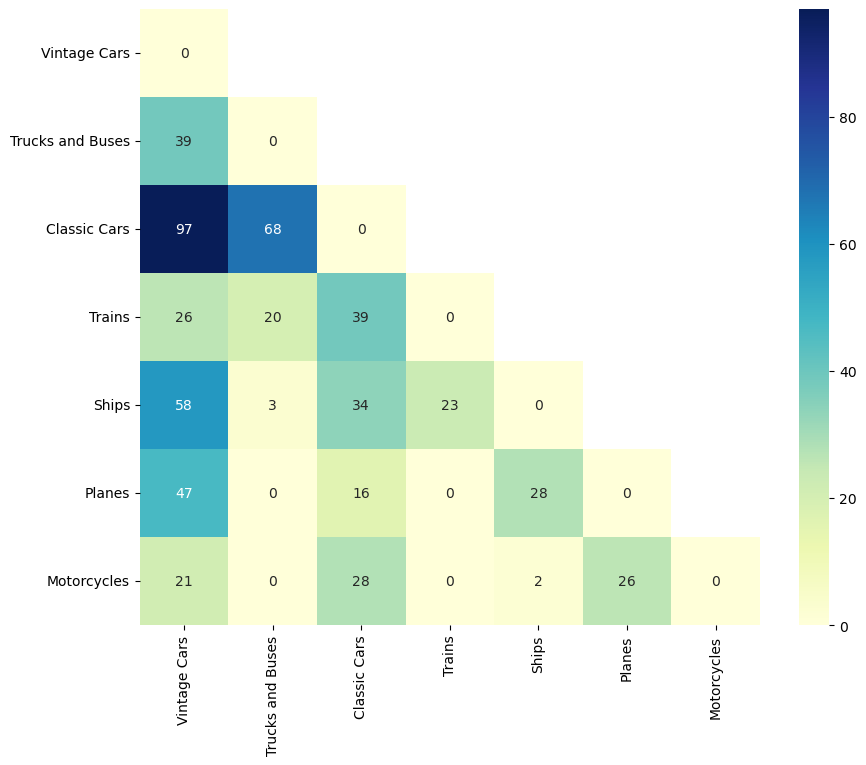

In [25]:
plt.figure(figsize = (10,8))
mask = np.triu(np.ones_like(product_combinations_df), k = 1)
sns.heatmap(product_combinations_df, annot = True, fmt = 'd', cmap="YlGnBu", mask = mask, vmin = 0)
plt.show()

## Step 4: Give observations

Từ biểu đồ
- Phần lớn các đơn hàng đều có sự xuất hiện của dòng Vintage Cars. Điều này cũng cho thấy được mối quan tâm rất lớn đối với dòng sản phẩm này.
- Classic Cars và Vintage Cars là dòng sản phẩm có tần số xuất hiện cùng nhau cao nhất, Classic Cars và Trucks and Bus đứng thứ hai. Cho thấy được xu hướng mua hàng: Khách hàng quan tâm đến các dòng xe hơi thì cũng quan tâm đễn các xe bus.
- Motocyles, plane, train là sản phẩm ít được đặt chung với các sản phẩm khác. Nguyên nhân có thể là do khách hàng chỉ quan tâm đến dòng xe mô tô ( xe 2 bánh) nên không chuộng thêm các dòng sản phẩm khác.